# StyleGAN2-ADA 이미지 생성하기

이 노트북은 다음 노트북을 합쳐서 만들고 한글 설명을 달았습니다.

- https://colab.research.google.com/github/dvschultz/ml-art-colabs/blob/master/Stylegan2_ada_Custom_Training.ipynb
- https://colab.research.google.com/github/Hephyrius/Stylegan2-Ada-Google-Colab-Starter-Notebook/blob/main/Stylegan2_Ada_Colab_Starter.ipynb

StyleGAN2-ADA 모델은 텐서플로우 1 버전에서만 작동합니다. 아래 셀을 실행해서 1 버전을 사용할 수 있도록 합니다.

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


현재 구글에서 어떤 GPU를 할당받았는지 알아봅니다. 노트북 위의 메뉴에서 Runtime > Change runtime type 으로 가서 GPU가 선택되었는지 확인하세요.

In [ ]:
!nvidia-smi

Fri Jul  1 08:38:30 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8    12W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

내 구글 계정의 드라이브를 이 노트북과 연동시킵니다. 앞으로는 구글 드라이브의 파일을 노트북에서 가져다쓰거나, 노트북에서 생성된 파일들을 내 드라이브로 저장할 수 있습니다.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Clone StyleGAN2-ADA Repo

StyleGAN2-ADA 관련된 코드를 노트북으로 불러와서 다운로드받습니다.

In [ ]:
# Download the code
%cd /content/
!git clone https://github.com/dvschultz/stylegan2-ada.git
!mkdir downloads
!mkdir datasets

/content
Cloning into 'stylegan2-ada'...
remote: Enumerating objects: 364, done.
remote: Total 364 (delta 0), reused 0 (delta 0), pack-reused 364
Receiving objects: 100% (364/364), 56.17 MiB | 32.08 MiB/s, done.
Resolving deltas: 100% (197/197), done.


## Visualize Training Progress

먼저 학습 과정에서 만들어진 중간 과정 이미지들을 모아서 타임랩스 비디오로 만들어봅니다.

In [ ]:
import cv2
from os import listdir
from os.path import isfile, join
from google.colab import files
from PIL import Image, ImageDraw
import numpy as np
from tqdm import tqdm
import imageio
import os

`reulst_path`를 학습 과정 이미지들을 저장한 폴더 경로로 바꿔줍니다. 경로 마지막에는 꼭 `/` 붙여주세요.

In [ ]:
# choose where you've saved results
# result_path = '/content/drive/MyDrive/Colab Notebooks/results/pokemon-256/00001-pokemon-256-mirror-auto1-gamma1-resumecustom/'
result_path = '/content/drive/MyDrive/last_project/stylegan/pokemon-256/00000-pokemon-256-mirror-auto1-gamma1-resumeffhq256/'
image_files = [f for f in listdir(result_path)]
image_files = [f for f in image_files if '.jpg' in f]

image_files.sort()

print(image_files)

['fakes000000.jpg', 'fakes000004.jpg', 'fakes000008.jpg', 'fakes000012.jpg', 'fakes000016.jpg', 'fakes000020.jpg', 'fakes000024.jpg', 'fakes000028.jpg', 'fakes000032.jpg', 'fakes000036.jpg', 'fakes000040.jpg', 'fakes000044.jpg', 'fakes_init.jpg', 'reals.jpg']


In [ ]:
images = []

# change settings width, width_images, height, height_images
width = 256
width_images = 8
width_offset = 0 * width
end_width = max(1920, width_images * width) 

height = 256
height_images = 4
height_offset = 0 * height
end_height = max(1280, height_images * height)


for f in tqdm(image_files[:]):
  name = "{}{}".format(result_path, f)
  print(name)
  img = Image.open(name)
  img = img.crop((0, 0, end_width+ width_offset, end_height + height_offset))
  img = img.resize((1920,1080))
  images.append(img)

  0%|          | 0/14 [00:00<?, ?it/s]

/content/drive/MyDrive/last_project/stylegan/pokemon-256/00000-pokemon-256-mirror-auto1-gamma1-resumeffhq256/fakes000000.jpg


  7%|▋         | 1/14 [00:01<00:13,  1.06s/it]

/content/drive/MyDrive/last_project/stylegan/pokemon-256/00000-pokemon-256-mirror-auto1-gamma1-resumeffhq256/fakes000004.jpg


 14%|█▍        | 2/14 [00:02<00:11,  1.01it/s]

/content/drive/MyDrive/last_project/stylegan/pokemon-256/00000-pokemon-256-mirror-auto1-gamma1-resumeffhq256/fakes000008.jpg


 21%|██▏       | 3/14 [00:02<00:10,  1.03it/s]

/content/drive/MyDrive/last_project/stylegan/pokemon-256/00000-pokemon-256-mirror-auto1-gamma1-resumeffhq256/fakes000012.jpg


 29%|██▊       | 4/14 [00:03<00:09,  1.01it/s]

/content/drive/MyDrive/last_project/stylegan/pokemon-256/00000-pokemon-256-mirror-auto1-gamma1-resumeffhq256/fakes000016.jpg


 36%|███▌      | 5/14 [00:04<00:08,  1.05it/s]

/content/drive/MyDrive/last_project/stylegan/pokemon-256/00000-pokemon-256-mirror-auto1-gamma1-resumeffhq256/fakes000020.jpg


 43%|████▎     | 6/14 [00:05<00:07,  1.07it/s]

/content/drive/MyDrive/last_project/stylegan/pokemon-256/00000-pokemon-256-mirror-auto1-gamma1-resumeffhq256/fakes000024.jpg


 50%|█████     | 7/14 [00:06<00:06,  1.05it/s]

/content/drive/MyDrive/last_project/stylegan/pokemon-256/00000-pokemon-256-mirror-auto1-gamma1-resumeffhq256/fakes000028.jpg


 57%|█████▋    | 8/14 [00:07<00:05,  1.06it/s]

/content/drive/MyDrive/last_project/stylegan/pokemon-256/00000-pokemon-256-mirror-auto1-gamma1-resumeffhq256/fakes000032.jpg


 64%|██████▍   | 9/14 [00:08<00:04,  1.06it/s]

/content/drive/MyDrive/last_project/stylegan/pokemon-256/00000-pokemon-256-mirror-auto1-gamma1-resumeffhq256/fakes000036.jpg


 71%|███████▏  | 10/14 [00:09<00:03,  1.09it/s]

/content/drive/MyDrive/last_project/stylegan/pokemon-256/00000-pokemon-256-mirror-auto1-gamma1-resumeffhq256/fakes000040.jpg


 79%|███████▊  | 11/14 [00:10<00:02,  1.08it/s]

/content/drive/MyDrive/last_project/stylegan/pokemon-256/00000-pokemon-256-mirror-auto1-gamma1-resumeffhq256/fakes000044.jpg


 86%|████████▌ | 12/14 [00:11<00:01,  1.12it/s]

/content/drive/MyDrive/last_project/stylegan/pokemon-256/00000-pokemon-256-mirror-auto1-gamma1-resumeffhq256/fakes_init.jpg


 93%|█████████▎| 13/14 [00:12<00:00,  1.09it/s]

/content/drive/MyDrive/last_project/stylegan/pokemon-256/00000-pokemon-256-mirror-auto1-gamma1-resumeffhq256/reals.jpg


100%|██████████| 14/14 [00:13<00:00,  1.07it/s]


노트북 Files에 video file을 저장할 폴더를 만들어줍니다.

In [ ]:
try:
  os.mkdir("/content/out/")
except:
  pass

In [ ]:
# change path to where you want to save video
video_output_path = '/content/out/'
video_name = 'timelapse_movie.mp4'
movie_name = video_output_path + video_name

with imageio.get_writer(movie_name, mode='I') as writer:
    for image in tqdm(list(images)):
        writer.append_data(np.array(image))

100%|██████████| 14/14 [00:00<00:00, 35.21it/s]


내 컴퓨터로 영상 파일을 다운로드합니다.

In [ ]:
files.download(movie_name) 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Generate Images

훈련이 끝난 모델을 불러와서 이미지를 생성해봅시다.

In [ ]:
%cd /content/stylegan2-ada

/content/stylegan2-ada


In [ ]:
import argparse
import numpy as np
import PIL.Image
import dnnlib
import dnnlib.tflib as tflib
import re
import sys
from io import BytesIO
import IPython.display
import numpy as np
from math import ceil
from PIL import Image, ImageDraw
import imageio
import os
import pickle
from google.colab import files

훈련시킨 모델 pkl 파일 경로를 `network_pkl`에 지정해줍니다.

In [ ]:
dnnlib.tflib.init_tf()

# change path
network_pkl = '/content/drive/MyDrive/last_project/stylegan/pokemon-256/00000-pokemon-256-mirror-auto1-gamma1-resumeffhq256/network-snapshot-000040.pkl'
 
print('Loading networks from "%s"...' % network_pkl)
with dnnlib.util.open_url(network_pkl) as fp:
    _G, _D, Gs = pickle.load(fp)
noise_vars = [var for name, var in Gs.components.synthesis.vars.items() if name.startswith('noise')]

Loading networks from "/content/drive/MyDrive/last_project/stylegan/pokemon-256/00000-pokemon-256-mirror-auto1-gamma1-resumeffhq256/network-snapshot-000040.pkl"...
Setting up TensorFlow plugin "fused_bias_act.cu": Compiling... Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Compiling... Loading... Done.


이미지를 생성하는데 필요한 함수들을 정의합니다.

In [ ]:
# Useful utility functions...

# Generates a list of images, based on a list of latent vectors (Z), and a list (or a single constant) of truncation_psi's.
def generate_images_in_w_space(dlatents, truncation_psi):
    Gs_kwargs = dnnlib.EasyDict()
    Gs_kwargs.output_transform = dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True)
    Gs_kwargs.randomize_noise = False
    Gs_kwargs.truncation_psi = truncation_psi
    dlatent_avg = Gs.get_var('dlatent_avg') # [component]

    imgs = []
    for row, dlatent in log_progress(enumerate(dlatents), name = "Generating images"):
        #row_dlatents = (dlatent[np.newaxis] - dlatent_avg) * np.reshape(truncation_psi, [-1, 1, 1]) + dlatent_avg
        dl = (dlatent-dlatent_avg)*truncation_psi   + dlatent_avg
        row_images = Gs.components.synthesis.run(dlatent,  **Gs_kwargs)
        imgs.append(PIL.Image.fromarray(row_images[0], 'RGB'))
    return imgs       

def generate_images(zs, truncation_psi):
    Gs_kwargs = dnnlib.EasyDict()
    Gs_kwargs.output_transform = dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True)
    Gs_kwargs.randomize_noise = False
    if not isinstance(truncation_psi, list):
        truncation_psi = [truncation_psi] * len(zs)
        
    imgs = []
    for z_idx, z in log_progress(enumerate(zs), size = len(zs), name = "Generating images"):
        Gs_kwargs.truncation_psi = truncation_psi[z_idx]
        noise_rnd = np.random.RandomState(1) # fix noise
        tflib.set_vars({var: noise_rnd.randn(*var.shape.as_list()) for var in noise_vars}) # [height, width]
        images = Gs.run(z, None, **Gs_kwargs) # [minibatch, height, width, channel]
        imgs.append(PIL.Image.fromarray(images[0], 'RGB'))
    return imgs

def generate_zs_from_seeds(seeds):
    zs = []
    for seed_idx, seed in enumerate(seeds):
        rnd = np.random.RandomState(seed)
        z = rnd.randn(1, *Gs.input_shape[1:]) # [minibatch, component]
        zs.append(z)
    return zs

# Generates a list of images, based on a list of seed for latent vectors (Z), and a list (or a single constant) of truncation_psi's.
def generate_images_from_seeds(seeds, truncation_psi):
    return generate_images(generate_zs_from_seeds(seeds), truncation_psi)

def saveImgs(imgs, location):
  for idx, img in log_progress(enumerate(imgs), size = len(imgs), name="Saving images"):
    file = location+ str(idx) + ".png"
    img.save(file)

def imshow(a, format='png', jpeg_fallback=True):
  a = np.asarray(a, dtype=np.uint8)
  str_file = BytesIO()
  PIL.Image.fromarray(a).save(str_file, format)
  im_data = str_file.getvalue()
  try:
    disp = IPython.display.display(IPython.display.Image(im_data))
  except IOError:
    if jpeg_fallback and format != 'jpeg':
      print ('Warning: image was too large to display in format "{}"; '
             'trying jpeg instead.').format(format)
      return imshow(a, format='jpeg')
    else:
      raise
  return disp

def showarray(a, fmt='png'):
    a = np.uint8(a)
    f = StringIO()
    PIL.Image.fromarray(a).save(f, fmt)
    IPython.display.display(IPython.display.Image(data=f.getvalue()))

        
def clamp(x, minimum, maximum):
    return max(minimum, min(x, maximum))
    
def drawLatent(image,latents,x,y,x2,y2, color=(255,0,0,100)):
  buffer = PIL.Image.new('RGBA', image.size, (0,0,0,0))
   
  draw = ImageDraw.Draw(buffer)
  cy = (y+y2)/2
  draw.rectangle([x,y,x2,y2],fill=(255,255,255,180), outline=(0,0,0,180))
  for i in range(len(latents)):
    mx = x + (x2-x)*(float(i)/len(latents))
    h = (y2-y)*latents[i]*0.1
    h = clamp(h,cy-y2,y2-cy)
    draw.line((mx,cy,mx,cy+h),fill=color)
  return PIL.Image.alpha_composite(image,buffer)
             
  
def createImageGrid(images, scale=0.25, rows=1):
   w,h = images[0].size
   w = int(w*scale)
   h = int(h*scale)
   height = rows*h
   cols = ceil(len(images) / rows)
   width = cols*w
   canvas = PIL.Image.new('RGBA', (width,height), 'white')
   for i,img in enumerate(images):
     img = img.resize((w,h), PIL.Image.ANTIALIAS)
     canvas.paste(img, (w*(i % cols), h*(i // cols))) 
   return canvas

def convertZtoW(latent, truncation_psi=0.7, truncation_cutoff=9):
  dlatent = Gs.components.mapping.run(latent, None) # [seed, layer, component]
  dlatent_avg = Gs.get_var('dlatent_avg') # [component]
  for i in range(truncation_cutoff):
    dlatent[0][i] = (dlatent[0][i]-dlatent_avg)*truncation_psi + dlatent_avg
    
  return dlatent

def interpolate(zs, steps):
   out = []
   for i in range(len(zs)-1):
    for index in range(steps):
     fraction = index/float(steps) 
     out.append(zs[i+1]*fraction + zs[i]*(1-fraction))
   return out

# Taken from https://github.com/alexanderkuk/log-progress
def log_progress(sequence, every=1, size=None, name='Items'):
    from ipywidgets import IntProgress, HTML, VBox
    from IPython.display import display

    is_iterator = False
    if size is None:
        try:
            size = len(sequence)
        except TypeError:
            is_iterator = True
    if size is not None:
        if every is None:
            if size <= 200:
                every = 1
            else:
                every = int(size / 200)     # every 0.5%
    else:
        assert every is not None, 'sequence is iterator, set every'

    if is_iterator:
        progress = IntProgress(min=0, max=1, value=1)
        progress.bar_style = 'info'
    else:
        progress = IntProgress(min=0, max=size, value=0)
    label = HTML()
    box = VBox(children=[label, progress])
    display(box)

    index = 0
    try:
        for index, record in enumerate(sequence, 1):
            if index == 1 or index % every == 0:
                if is_iterator:
                    label.value = '{name}: {index} / ?'.format(
                        name=name,
                        index=index
                    )
                else:
                    progress.value = index
                    label.value = u'{name}: {index} / {size}'.format(
                        name=name,
                        index=index,
                        size=size
                    )
            yield record
    except:
        progress.bar_style = 'danger'
        raise
    else:
        progress.bar_style = 'success'
        progress.value = index
        label.value = "{name}: {index}".format(
            name=name,
            index=str(index or '?')
        )

`truncation_psi` 값을 변경(0에서 1 사잇값)해서 결과 이미지의 다양성을 조절할 수 있습니다. 값을 높이면 다양한 결과가 나옵니다.

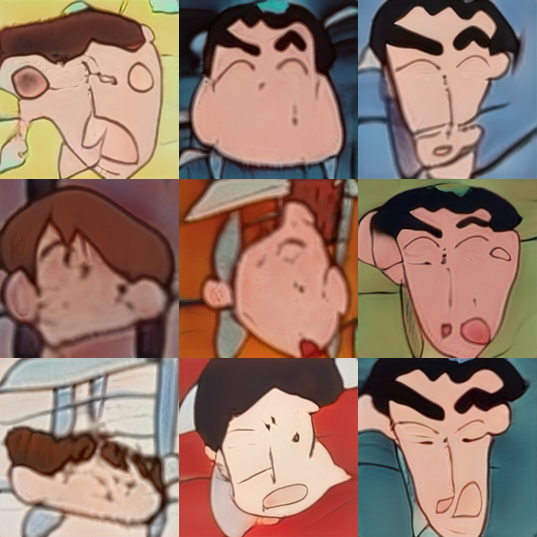

In [ ]:
seeds = np.random.randint((2**32 - 1), size=9)
imshow(createImageGrid(generate_images_from_seeds(seeds, truncation_psi=0.9), 0.7 , 3))

결과이미지를 interpolate해서 영상으로 만들어봅니다. 

In [ ]:
video_output_path = '/content/out/'
video_name = 'interpolation_movie.mp4'
movie_name = video_output_path + video_name

In [ ]:
try:
  os.mkdir(video_output_path)
except:
  pass

`number_of_steps`와 `trunc_psi` 값을 조절해보세요.

In [ ]:
# interpolate between 10 seeds (last one back to first to loop)
number_of_steps = 10
trunc_psi = 0.9

seeds = list(np.random.randint((2**32) - 1, size=9))
seeds = seeds + [seeds[0]]
zs = generate_zs_from_seeds(seeds)


imgs = generate_images(interpolate(zs,number_of_steps), trunc_psi)

with imageio.get_writer(movie_name, mode='I') as writer:
    for image in log_progress(list(imgs), name = "Creating animation"):
        writer.append_data(np.array(image))

In [ ]:
files.download(movie_name) 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# project into w space
number_of_steps = 10
trunc_psi = 0.5

video_name = 'interpolation_ws_movie.mp4'
movie_name = video_output_path + video_name

dls = []
for z in zs:
  dls.append(convertZtoW(z ,truncation_psi=trunc_psi))

imgs = generate_images_in_w_space(interpolate(dls,number_of_steps), trunc_psi)

with imageio.get_writer(movie_name, mode='I') as writer:
    for image in log_progress(list(imgs), name = "Creating animation"):
        writer.append_data(np.array(image))

In [ ]:
files.download(movie_name) 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>